# ***PROBLEM DEFINITION***
The data set contains students acadenic records as well as placement and salary information of the 215 students of a business school in India.

**Let's take a look at the different variables of the data set.**

- sl_no : Serial Number

- gender: Gender- Male='M',Female='F'

- ssc_p : Secondary Education percentage- 10th Grade

- ssc_b : Board of Education- Central/ Others

- hsc_p:Higher Secondary Education percentage- 12th Grade

- hsc_b : Board of Education- Central/ Others- 12th Grade

- hsc_s : Specialization in Higher Secondary Education

- degree_p: Degree Percentage

- degree_t: Under Graduation(Degree type)- Field of degree education

- workex : Work Experience

- etest_p: Entrance Test Percentage

- mba_p: MBA Percentage

- status : Placed or not

- salary : Salary offered

## **Data Analysis  on Campus Placement Data**
- **Explatory Data Analysis**
- **Prediction of wheather student gets placed or not (Binary Classification)**
- **Determining characteristics affecting placement**
- **Predition of Salary secured by a student (Regression)**
- **Determining characteristics affecting salary**

## **Here I analyze some common questions**
- **Does GPA affect placement?**
- **Does Higher Secondary School's Percentage still affect campus placement?**
- **Is work experience required for securing good job?**
- **What factor affect the salary?**

In [1]:
#data import and analysis about data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [2]:
# Import data set
df=pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
# explore data set
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [4]:
# Explore columns of the data set
all_cols=df.columns
all_cols

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

### **Since "sl_no" is not effect to our analysis , we can remove it**

In [5]:
df=df.drop('sl_no',axis=1)

In [6]:
df.head() # check to remove or not

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


- **we can see that only salary columns have some missing values**

## **Data visualization and explore some reltionship with target variable**

### Feature : gender

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


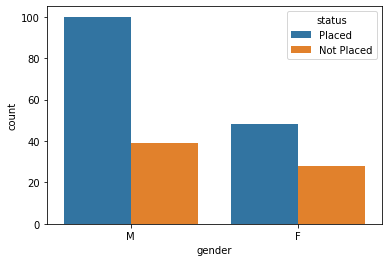

In [8]:
sns.countplot('gender',hue='status',data=df)
plt.show()

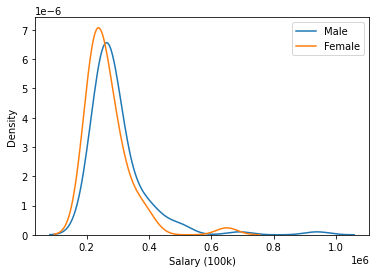

In [9]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(df.salary[ df.gender=="M"])
sns.kdeplot(df.salary[ df.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()


c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


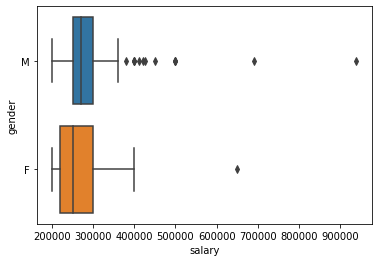

In [10]:
sns.boxplot("salary", "gender", data=df)
plt.show()

### Insights
- More outliers on Male => Male students are getting high CTC jobs.
- Male students are offered slightly greater salary than female on an average.

### Feature : secondary , higher secondary & Degree

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


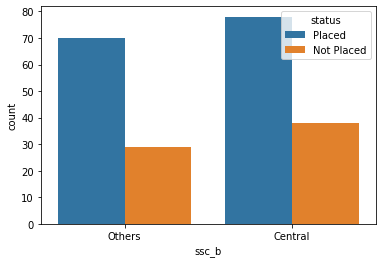

In [11]:
sns.countplot('ssc_b',hue='status',data=df)
plt.show()

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='ssc_b'>

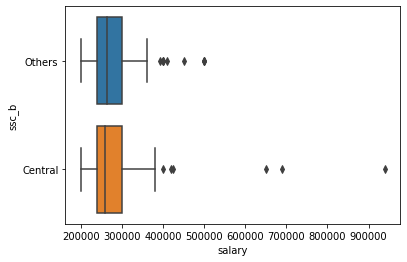

In [12]:
sns.boxplot('salary','ssc_b',data=df)

- Outliers on both, but Secondary students from Central Board are getting the highly paid jobs.


c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


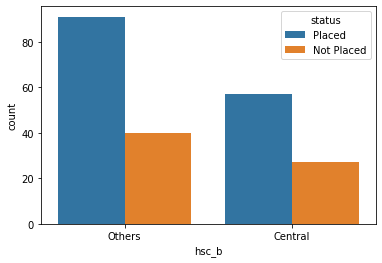

In [13]:
sns.countplot('hsc_b',hue='status',data=df)
plt.show()

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='hsc_b'>

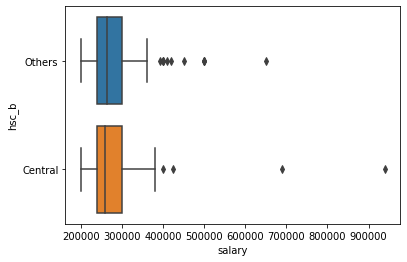

In [14]:
sns.boxplot('salary','hsc_b',data=df)

- Outliers on both, but Higher SEcondary students from Central Board are getting the highly paid jobs.

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='degree_t', ylabel='count'>

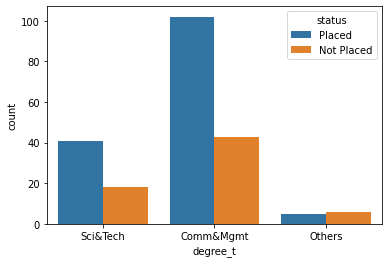

In [15]:
sns.countplot('degree_t',hue='status',data=df)

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


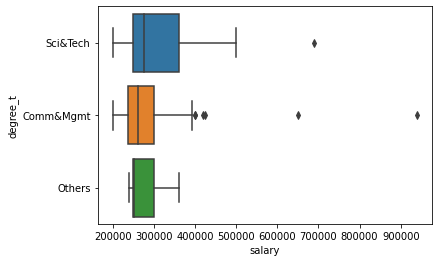

In [16]:
sns.boxplot("salary", "degree_t", data=df)
plt.show()

- Science&Tech students getting more salary on average
- Management stidents are getting more highly paid dream jobs.

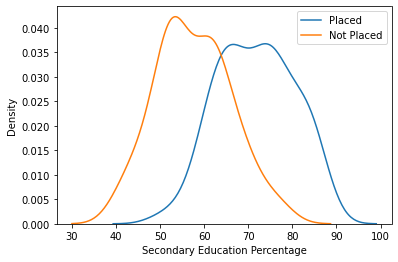

In [17]:
#Kernel-Density Plot secondary percentage
sns.kdeplot(df.ssc_p[ df.status=="Placed"])
sns.kdeplot(df.ssc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

- All students with Secondary Education Percentage above 90% are placed
- All students with Secondary Education Percentage below 50% are not-placed
- Students with good Secondary Education Percentage are placed on average.

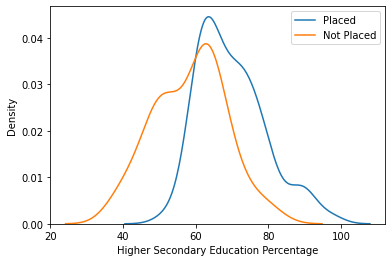

In [18]:
#Kernel-Density Plot higher secondary percentage
sns.kdeplot(df.hsc_p[ df.status=="Placed"])
sns.kdeplot(df.hsc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

- All students with Secondary Education Percentage above 90% are placed
- All students with Secondary Education Percentage below 50% are not-placed
- Students with good Secondary Education Percentage are placed on average.

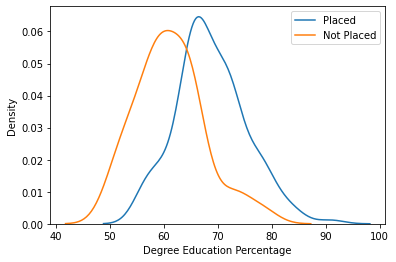

In [19]:
#Kernel-Density Plot higher secondary percentage
sns.kdeplot(df.degree_p[ df.status=="Placed"])
sns.kdeplot(df.degree_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Degree Education Percentage")
plt.show()

- Overlap here too. But More placements for percentage above 65.
- G Percentage least 50% to get placement

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


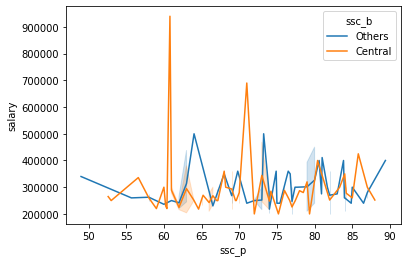

In [20]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=df)
plt.show()

- No specific pattern (correlation) between Secondary Education Percentage and Salary.
- secondary percentage  is Not Affecting Salary

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


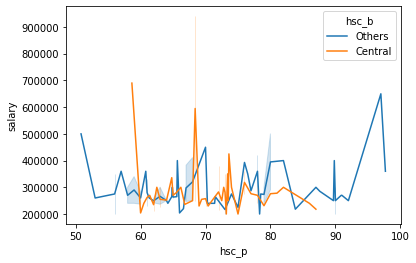

In [21]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=df)
plt.show()

- High salary from both Central and Other.
- High salary for both high and low percentage.
- Thus, both these feature doesnot affect salary.

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


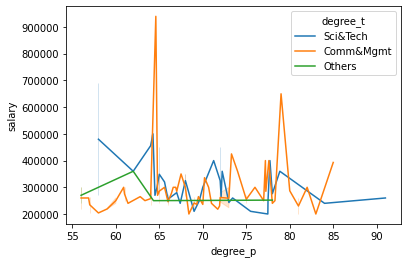

In [22]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=df)
plt.show()

- Percentage does not seem to affect salary.
- Commerce&Mgmt students occasionally get dream placements with high salary

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


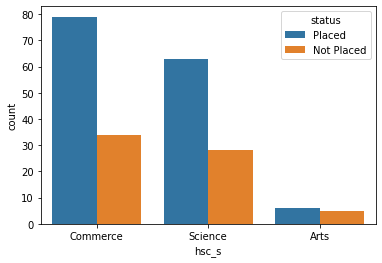

In [23]:
sns.countplot("hsc_s", hue="status", data=df)
plt.show()

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


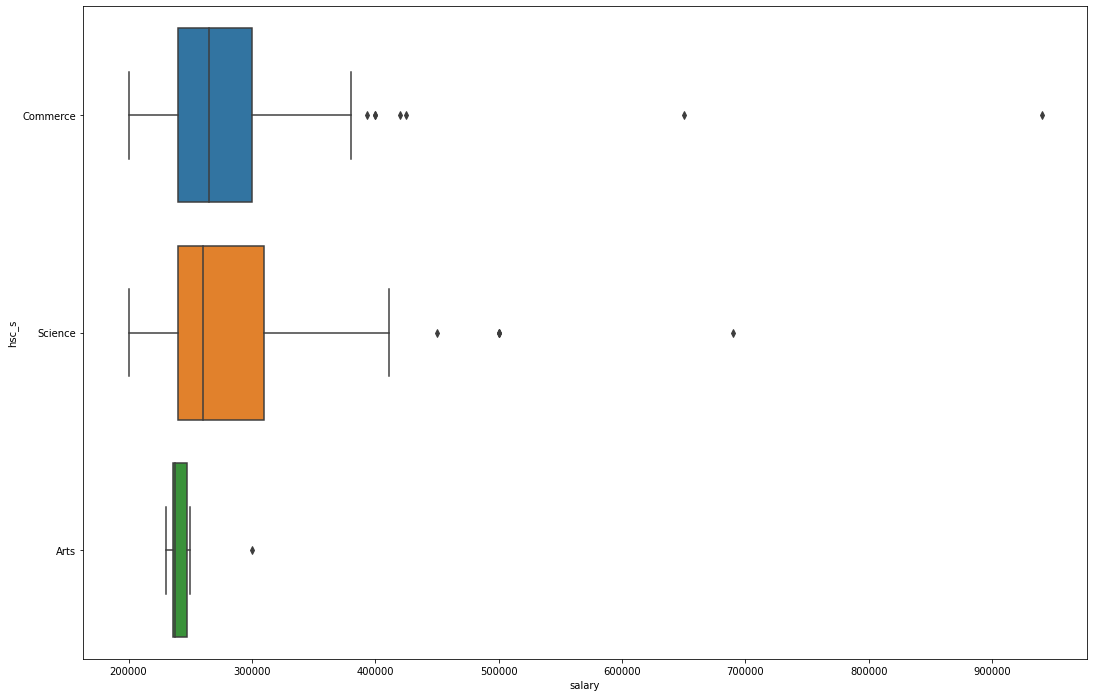

In [24]:
plt.figure(figsize=(18,12))
sns.boxplot('salary','hsc_s',data=df)
plt.show()

- commerce student get more placed
- commerce students are get more salary
- arts students placement are not well

### Feature: workex (Work Experience)¶
- Does Work Experience affect placements?

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


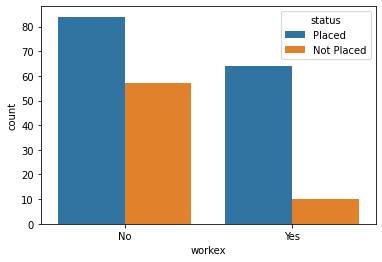

In [25]:
sns.countplot("workex", hue="status", data=df)
plt.show()

- ### This affects Placement.
- Very few students with work experience not getting placed!

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


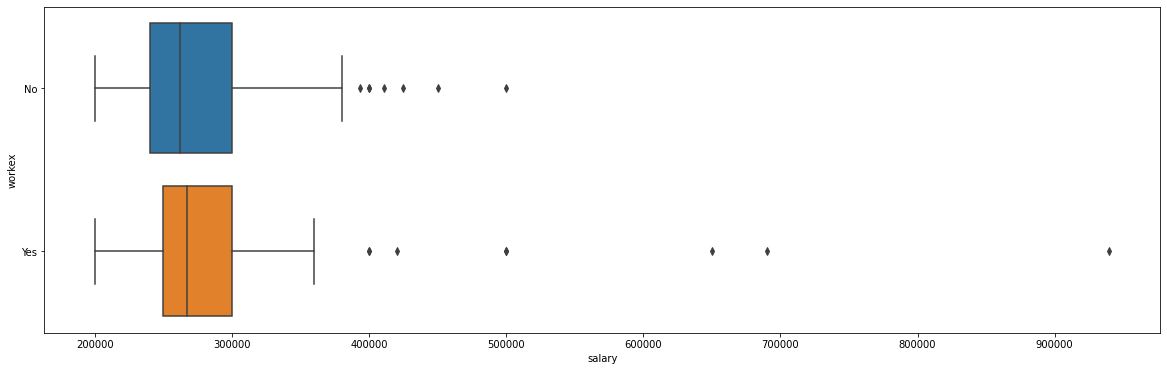

In [26]:
plt.figure(figsize=(20,6))
sns.boxplot('salary','workex',data=df)
plt.show()

- Average salary as well as base salary high for students with work experience.

### Feature: etest_p (Employability test percentage)

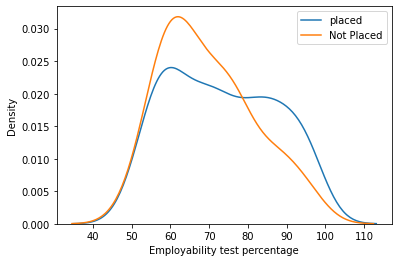

In [27]:
# kernel density plot
sns.kdeplot(df.etest_p[df.status=='Placed'])
sns.kdeplot(df.etest_p[df.status=='Not Placed'])
plt.legend(['placed','Not Placed'])
plt.xlabel('Employability test percentage')
plt.show()

- High overlap -> It does not affect placement status much
- More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


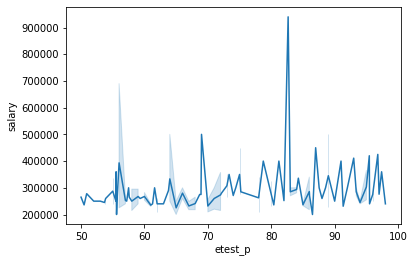

In [28]:
sns.lineplot("etest_p", "salary", data=df)
plt.show()

- This feature surprisingly does not affect placements and salary much

### Feature: specialisation (Post Graduate Specialization)

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


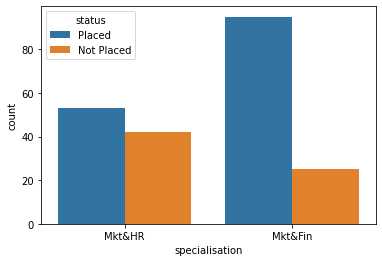

In [29]:
sns.countplot('specialisation',hue='status',data=df)
plt.show()

- This feature affects Placement status.
- Comparitively very low not-placed students in Mkt&Fin Section

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


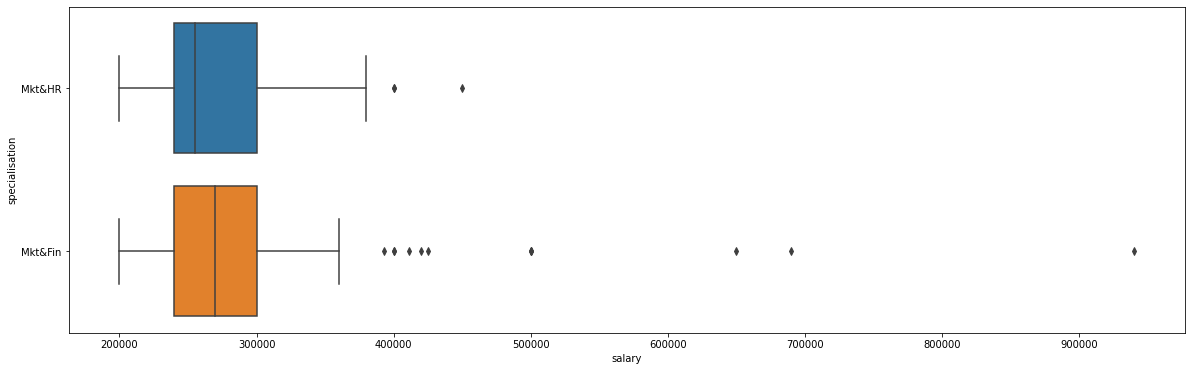

In [30]:
plt.figure(figsize=(20,6))
sns.boxplot('salary','specialisation',data=df)
plt.show()

- effect so much on salary
- More Highly Paid Jobs for Mkt&Fin students

### Feature: mba_p (MBA percentage)

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


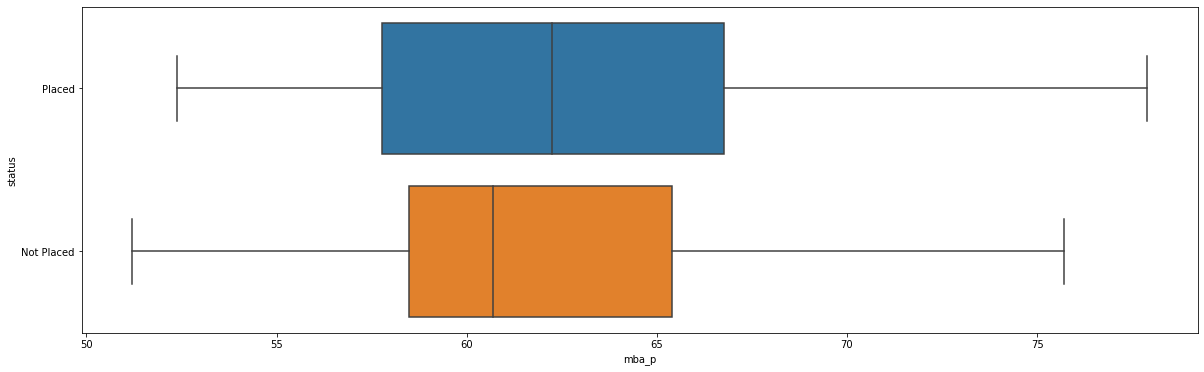

In [31]:
plt.figure(figsize=(20,6))
sns.boxplot('mba_p','status',data=df)
plt.show()


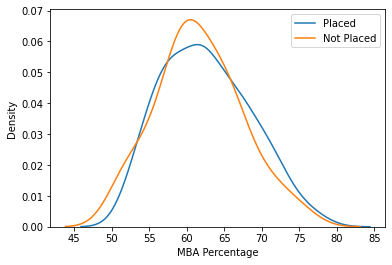

In [32]:
#Kernel-Density Plot mba percentage
sns.kdeplot(df.mba_p[ df.status=="Placed"])
sns.kdeplot(df.mba_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("MBA Percentage")
plt.show()

- mba percentage not much efect on placement
- percentage > 65 are placed 

c:\users\vaskar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


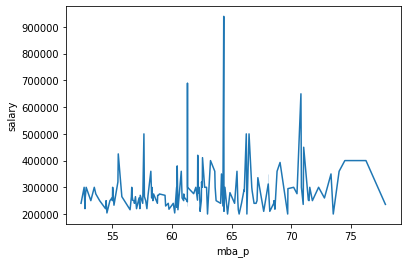

In [33]:
sns.lineplot("mba_p", "salary", data=df)
plt.show()

- percentage not effect in salary

# Feature Selection
### Using Only following features 

- Gender
- Secondary Education percentage
- Higher Secondary Education
- Higher Secondary Education Percentsge
- Specialization in Higher Secondary Education
- Under Graduate Dergree Percentage
- Under Graduation Degree Field
- Work Experience
- emplo
- Specialization
- MBA Percentage

### *Data Pre-Processing* 

In [34]:
df.drop(['ssc_b','hsc_b'],axis= 1, inplace= True)

In [35]:
df.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

## Feature Encoding

### Label encode

In [36]:
data=df.copy()

In [37]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [38]:
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,1,270000.0
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,1,200000.0
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,1,250000.0
3,0,56.00,52.00,1,52.00,1,0,66.0,0,59.43,0,NaN
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,1,425000.0


## Problem Statement

- Predicting If Students gets placed or not (Binary Classification Problem)
- Predicting Salary of Student (Regression Problem)

In [39]:
#Lets make a copy of data, before we proceeed with specific problems
df_clf = data.copy()
df_reg = data.copy()

## Binary Classification Problem¶


- Decision Tree Based Models

- for this problem salary is not required
- remove salary column from thw data set

In [40]:
df_clf.drop(['salary'], axis=1, inplace= True)

In [41]:
df_clf

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,1
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,1
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,1
3,0,56.00,52.00,1,52.00,1,0,66.0,0,59.43,0
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,0,77.60,0,0,91.0,1,74.49,1
211,0,58.00,60.00,1,72.00,1,0,74.0,1,53.62,1
212,0,67.00,67.00,0,73.00,0,1,59.0,1,69.72,1
213,1,74.00,66.00,0,58.00,0,0,70.0,0,60.23,1


In [42]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
df_clf=df_clf.sample(frac=1).reset_index(drop=True) # shuffle data set

In [44]:
df_clf['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

- we can see that 148 are placed and 67 are not placed
- Data set is imbalanced

In [45]:
X=df_clf.iloc[:,0:10]
y=df_clf['status']

In [46]:
X

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,49.00,39.00,1,65.00,2,0,63.00,1,51.21
1,1,77.00,61.00,0,68.00,0,1,57.50,1,61.31
2,0,58.00,62.00,0,64.00,0,0,53.88,1,54.97
3,1,56.28,62.83,0,59.79,0,0,60.00,0,57.29
4,0,60.80,68.40,0,64.60,0,1,82.66,1,64.34
...,...,...,...,...,...,...,...,...,...,...
210,0,65.00,71.50,0,62.80,0,1,57.00,1,56.60
211,0,77.67,64.89,0,70.67,0,0,89.00,1,60.39
212,0,51.00,54.00,1,61.00,1,0,60.00,0,60.64
213,1,48.00,51.00,0,58.00,0,1,60.00,0,58.79


In [47]:
X.shape,y.shape

((215, 10), (215,))

In [48]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [49]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((172, 10), (172,), (43, 10), (43,))

### Applying Decision Tree

In [50]:
dtree = DecisionTreeClassifier()
dtree=dtree.fit(X_train, y_train)

In [51]:
dtree.score(X_train,y_train)

1.0

In [52]:
predict_y=dtree.predict(X_test)

In [53]:
confusion_matrix(y_test,predict_y)

array([[ 7,  3],
       [ 7, 26]], dtype=int64)

- we see that model accuracy is 100% in training set but it fail to predict correctly for test set
- So there is some overfitting problem 

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
score=cross_val_score(dtree,X_train,y_train,cv=3,scoring='accuracy')

In [56]:
score.mean()*100

77.89876991328897

### we see that accuracy fall from 100% to 78% after cross validation

### Hyper Parameter tunning to reduce overfitting

In [57]:
# hyper parameter tunning
grid_parameter = {'criterion':['gini', 'entropy'],'min_samples_split':[5,10,15,20,25,30,35],'max_depth':[6,7,8,9,10,11]}

In [58]:
grid_search=GridSearchCV(dtree,param_grid=grid_parameter,scoring='accuracy',cv=3,verbose=True)

In [59]:
grid_search = grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


In [60]:
# optimum parameter
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 5}

In [61]:
dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=11)
dtree=dtree.fit(X_train, y_train)

In [62]:
dtree.score(X_train,y_train)*100

97.09302325581395

In [63]:
y_pred = dtree.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.8604651162790697

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.91      0.91      0.91        33

    accuracy                           0.86        43
   macro avg       0.80      0.80      0.80        43
weighted avg       0.86      0.86      0.86        43



In [66]:
confusion_matrix(y_test,y_pred)

array([[ 7,  3],
       [ 3, 30]], dtype=int64)

In [67]:
from sklearn import tree

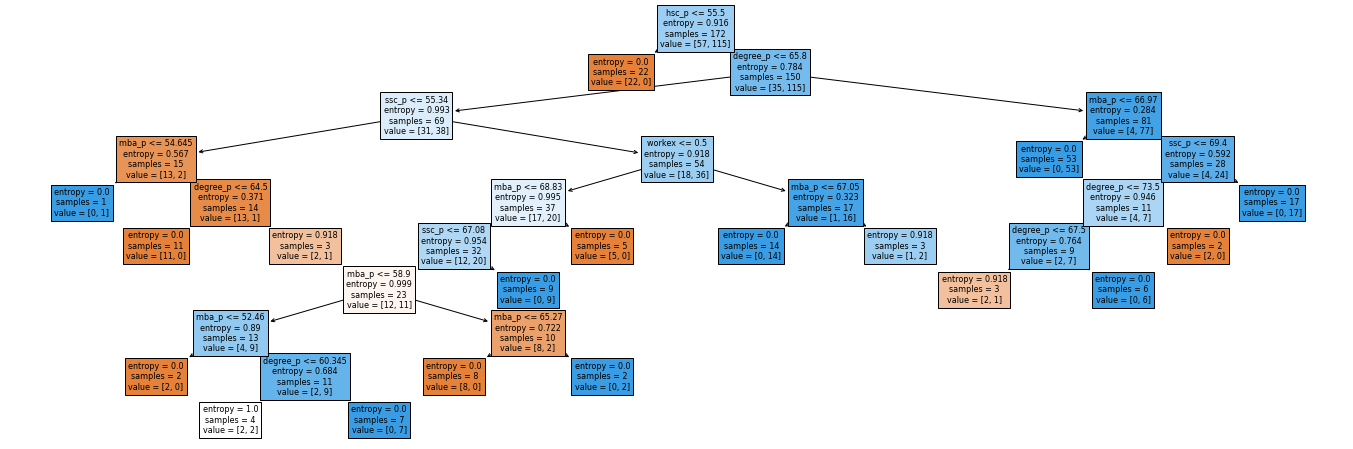

In [68]:
plt.figure(figsize=(24,8))
tree.plot_tree(dtree,feature_names=X_train.columns,filled=True)
plt.show()

In [69]:
result= pd.DataFrame({'features_name':X.columns,'importances':dtree.feature_importances_})

In [70]:
result

,features_name,importances
0,gender,0.000000
1,ssc_p,0.166079
2,hsc_p,0.275513
3,hsc_s,0.000000
4,degree_p,0.273199
5,degree_t,0.000000
6,workex,0.050065
7,etest_p,0.000000
8,specialisation,0.000000
9,mba_p,0.235144


# Logistic Regression

### One hot encoding

In [71]:
X=df_clf.iloc[:,0:10]
y=df_clf['status']

In [72]:
# Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

In [73]:
X # to chek

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,49.00,39.00,Science,65.00,Others,No,63.00,Mkt&Fin,51.21
1,F,77.00,61.00,Commerce,68.00,Comm&Mgmt,Yes,57.50,Mkt&Fin,61.31
2,M,58.00,62.00,Commerce,64.00,Comm&Mgmt,No,53.88,Mkt&Fin,54.97
3,F,56.28,62.83,Commerce,59.79,Comm&Mgmt,No,60.00,Mkt&HR,57.29
4,M,60.80,68.40,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34
...,...,...,...,...,...,...,...,...,...,...
210,M,65.00,71.50,Commerce,62.80,Comm&Mgmt,Yes,57.00,Mkt&Fin,56.60
211,M,77.67,64.89,Commerce,70.67,Comm&Mgmt,No,89.00,Mkt&Fin,60.39
212,M,51.00,54.00,Science,61.00,Sci&Tech,No,60.00,Mkt&HR,60.64
213,F,48.00,51.00,Commerce,58.00,Comm&Mgmt,Yes,60.00,Mkt&HR,58.79


- we see that only salary columns have 67 null value

In [74]:
X=pd.get_dummies(X,columns=["gender","hsc_s","degree_t","workex","specialisation"])

 Since the values are in different scale . So we need to scale them into 0-1 range

In [75]:
from sklearn.preprocessing import MinMaxScaler


In [76]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
X_scaled

array([[0.16718202, 0.03294893, 0.36585366, ..., 0.        , 1.        ,
        0.        ],
       [0.7443826 , 0.39538715, 0.43902439, ..., 1.        , 1.        ,
        0.        ],
       [0.35271078, 0.41186161, 0.34146341, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.20841064, 0.2800659 , 0.26829268, ..., 0.        , 0.        ,
        1.        ],
       [0.14656772, 0.2306425 , 0.19512195, ..., 1.        , 0.        ,
        1.        ],
       [0.68171511, 0.69192751, 0.41463415, ..., 0.        , 1.        ,
        0.        ]])

### split data set into training and test set

In [117]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [118]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((172, 17), (172,), (43, 17), (43,))

In [119]:
logistic_reg = LogisticRegression()
logistic_reg=logistic_reg.fit(X_train, y_train)

In [120]:
# Training Accuracy
logistic_reg.score(X_train,y_train)*100

89.53488372093024

### validate with test data and check accuracy for test data

In [121]:
y_pred=logistic_reg.predict(X_test)

In [122]:
pd.crosstab(y_test,y_pred)

col_0,0,1
status,,
0,10,4
1,2,27


In [123]:
logistic_reg.score(X_test,y_test)*100

86.04651162790698

Now we try to improve our model by some cross validation and hyperparameter tunning

In [124]:
score_val=cross_val_score(logistic_reg,X_train,y_train,cv=5,scoring='accuracy')

In [125]:
score_val.mean()*100

86.0672268907563

In [126]:
# hyper parameter tunning
grid_para = {'C':[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5],'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [127]:
grid_search=GridSearchCV(logistic_reg,param_grid=grid_para,scoring='accuracy',cv=5,verbose=True)

In [128]:
grid_search=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


In [129]:
# Optimum parameter
grid_search.best_params_

{'C': 5, 'solver': 'liblinear'}

### Optimium model

In [130]:
logistic_reg = LogisticRegression(C=5,solver='liblinear')
logistic_reg=logistic_reg.fit(X_train, y_train)

In [131]:
# training accuracy
logistic_reg.score(X_train,y_train)

0.9011627906976745

In [132]:
y_pred=logistic_reg.predict(X_test)

In [133]:
logistic_reg.score(X_test,y_test)*100

83.72093023255815

In [134]:
confusion_matrix(y_test,y_pred)

array([[10,  4],
       [ 3, 26]], dtype=int64)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.87      0.90      0.88        29

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.81        43
weighted avg       0.83      0.84      0.84        43



In [136]:
logistic_reg.coef_

array([[ 6.60233861,  3.35812337,  3.98072902, -0.83622657, -2.62246124,
        -1.03154177, -0.22467946, -0.41874115, -0.8107069 , -0.02677318,
         0.46132642, -0.60563529, -1.11191236, -1.63266162,  0.37644039,
        -0.33476669, -0.92145454]])

In [137]:
logistic_reg.intercept_

array([-1.25622123])

- we can see that percentage score of each degree courses are more impact in Placement

----------------Thank you-------------